<a href="https://colab.research.google.com/github/vopula/predictionCalorie/blob/linear-regression-model/regressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [1]:
!wget Url test.csv https://raw.githubusercontent.com/vopula/predictionCalorie/refs/heads/master/test.csv
!wget Url train.csv https://raw.githubusercontent.com/vopula/predictionCalorie/refs/heads/master/train.csv
!wget Url sample_submission.csv https://raw.githubusercontent.com/vopula/predictionCalorie/refs/heads/master/sample_submission.csv

--2025-05-11 09:53:23--  http://url/
Resolving url (url)... failed: Name or service not known.
wget: unable to resolve host address ‘url’
--2025-05-11 09:53:23--  http://test.csv/
Resolving test.csv (test.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘test.csv’
--2025-05-11 09:53:23--  https://raw.githubusercontent.com/vopula/predictionCalorie/refs/heads/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10524308 (10M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]  10.04M  60.4MB/s    in 0.2s    

2025-05-11 09:53:23 (60.4 MB/s) - ‘test.csv’ saved [10524308/10524308]

FINISHED --2025-05-11 09:53:23--
Total wall clock time: 0.6s
Downloaded: 1 files, 10M in 0.2s (60.4 MB/s)
--2

**Problem to solve: predict how many calories were burned during a workout**

*For data scientist its all about reducing error in prediction.*

Correlation of column and target varible
1. Body_Temp is related to calories because the process creates heat and maintains a healthy baseline internal temperature (https://www.forhers.com/blog/how-to-raise-core-body-temperature-for-weight-loss)
2. Heart_Rate is related to calories because heart beats faster means muscle need more oxygen-rich blood and the body uses calorie to keep up with the extra oxygen needed (https://www.coospo.com/blogs/knowledge/calories-burned-by-heart-rate-understanding-the-connection?srsltid=AfmBOoqn33saM4wUE6pgDOfI-TY7ojgJB_SzwTnhLiMDI1fjusd0pn0_)
3. Duration is affecting calorie but up to one time because low to moderate lead to higher calorie burn but high activity some kind of conserving energy it has (https://magazine.scienceconnected.org/2021/03/more-exercise-doesnt-always-burn-more-calories/)
4. Weight does affect calorie because heavier person need more energy to move the body (https://www.livestrong.com/article/300582-do-fat-people-burn-more-calories/)
5. Height affect calorie because higher metabloc rate than short people (https://sportcoaching.co.nz/do-taller-people-burn-more-calories/)
6. Sex has affection to calorie because larger muscle mass (https://www.everydayhealth.com/fitness/factors-that-can-affect-how-many-calories-you-burn/)
7. Age do affect calorie because key hormone that promote protein systhesis become more resistant as getting older (https://www.everydayhealth.com/fitness/factors-that-can-affect-how-many-calories-you-burn/)

# Data Preprocessing

In [19]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_train.head(6)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,5,female,26,156.0,56.0,19.0,100.0,40.5,103.0


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [21]:
df_test = pd.read_csv('test.csv')
df_test.head(3)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4


In [22]:
def basic_preprocessing(dataset, isDataTrain=False):
    dataset_prep = dataset.copy()
    dataset_prep.drop_duplicates(inplace=True)
    dataset_prep.drop('id', axis=1, inplace=True)
    encoded_df = pd.get_dummies(dataset_prep['Sex'], prefix='Sex', dtype=int)
    dataset_prep = pd.concat([dataset_prep, encoded_df], axis=1).drop('Sex', axis=1)
    cols_to_scale = [x for x in range(dataset_prep.shape[1] - 2)]

    dataset_prep.iloc[:, cols_to_scale] = dataset_prep.iloc[:, cols_to_scale].astype(float)
    mean = dataset_prep.iloc[:, cols_to_scale].mean()
    std = dataset_prep.iloc[:, cols_to_scale].std()
    scaled_data = dataset_prep.copy()
    scaled_data.iloc[:, cols_to_scale] = (dataset_prep.iloc[:, cols_to_scale] - mean) / std

    column_reposition = ['Sex_female', 'Sex_male', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

    if isDataTrain:
        column_reposition.append('Calories')
        scaled_data = scaled_data[column_reposition]
        return scaled_data, std, mean
    else:
        scaled_data = scaled_data[column_reposition]
        return scaled_data

In [23]:
df_train, std, mean = basic_preprocessing(df_train, isDataTrain=True)
df_test = basic_preprocessing(df_test)

<ipython-input-22-263559ed1de8>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         36.0
1         64.0
2         51.0
3         20.0
4         38.0
          ... 
749995    28.0
749996    64.0
749997    60.0
749998    45.0
749999    39.0
Name: Age, Length: 750000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_prep.iloc[:, cols_to_scale] = dataset_prep.iloc[:, cols_to_scale].astype(float)
<ipython-input-22-263559ed1de8>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         45.0
1         26.0
2         29.0
3         39.0
4         30.0
          ... 
249995    56.0
249996    32.0
249997    31.0
249998    62.0
249999    31.0
Name: Age, Length: 250000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_prep

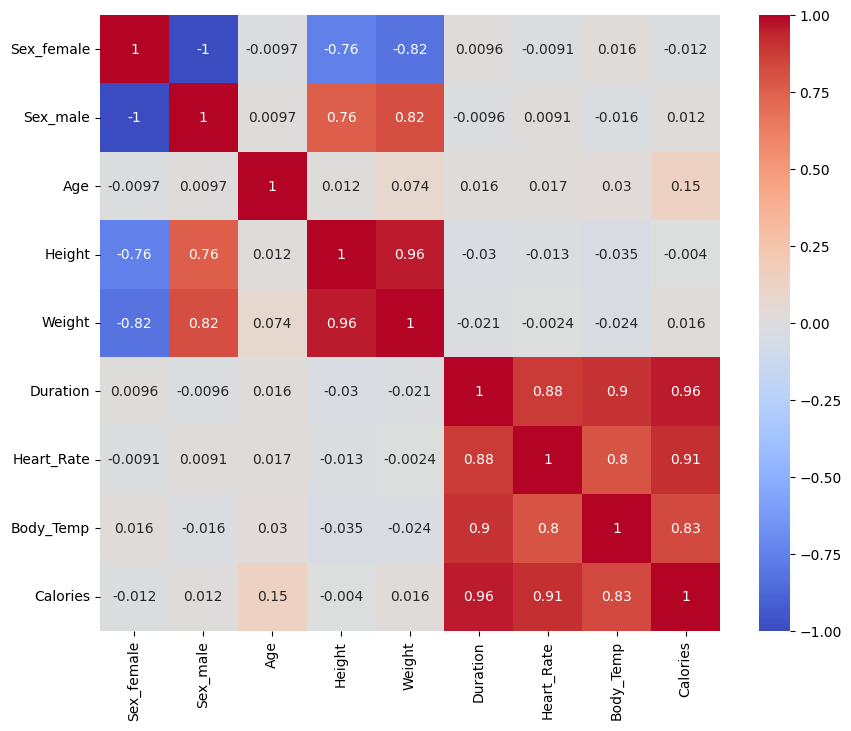

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [25]:
data_train = df_train[['Body_Temp', 'Heart_Rate', 'Duration', 'Calories']]
data_test = df_test[['Body_Temp', 'Heart_Rate', 'Duration']]

In [26]:
data_train_all = df_train.copy()
data_test_all = df_test.copy()

# Modelling

In [27]:
from sklearn.model_selection import train_test_split

X = data_train.drop('Calories', axis=1)
y = data_train['Calories']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
import numpy as np

def rmsle(y_true, y_pred):
    """
    Calculates the Root Mean Squared Logarithmic Error (RMSLE).
    """
    log_diff = np.log1p(y_pred) - np.log1p(y_true)
    rmsle_score =  np.sqrt(np.mean(log_diff ** 2))
    print(f"RMSLE: {rmsle_score}")

In [29]:
def inverse_transform(scaled_data, std=std['Calories'], mean=mean['Calories']):
    std = std.to_numpy() if isinstance(std, pd.Series) else std
    mean = mean.to_numpy() if isinstance(mean, pd.Series) else mean

    std = std.reshape(1, -1)
    mean = mean.reshape(1, -1)

    original_data = scaled_data * std + mean
    return original_data.ravel()

## Linear Regression (with 3 features)

In [29]:
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
calories_predict_reg = model_reg.predict(X_val)
print(calories_predict_reg[:20])
calories_predict_reg = inverse_transform(calories_predict_reg, std['Calories'], mean['Calories'])
print(len([i for i in calories_predict_reg if i < 0]))

[ 1.63677487 -0.37908788 -0.74719345  0.30614959 -0.59745999 -0.05420961
 -0.94551403 -0.64406494  1.01081635  1.30021369 -0.58865918 -0.92946239
 -1.01297155  0.41265575  0.86833373  0.04399127  0.72978764 -1.42780878
 -0.90615991 -0.54487298]
5501


In [39]:
print(np.any(calories_predict_reg < 0))
calories_predict_reg = np.where(calories_predict_reg < 0, 0, calories_predict_reg)

True


In [41]:
print(np.any(calories_predict_reg < 0))

False


In [40]:
rmsle(y_val, calories_predict_reg)  # Hitung RMSLE dengan calories_predict_reg yang sudah diperbaiki

RMSLE: 4.763966183827861


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
y_pred = model_reg.predict(data_test)
y_pred = inverse_transform(y_pred, std['Calories'], mean['Calories'])

In [44]:
y_pred = np.where(y_pred < 0, 0, y_pred)
y_pred = np.round(y_pred, 3)
df_result = pd.DataFrame({
    'id': np.arange(750000, 750000 + len(y_pred)),
    'Calories': y_pred
})
df_result.set_index("id", inplace=True)

In [47]:
print(np.any(y_pred < 0))

False


In [50]:
df_result[df_result['Calories'] <= 0]

,Calories
id,
750007,0.0
750023,0.0
750029,0.0
750108,0.0
750147,0.0
...,...
999904,0.0
999967,0.0
999969,0.0


In [52]:
df_result.to_csv("linear_reg1.csv", sep=",")

In [53]:
pd.read_csv("linear_reg1.csv")

,id,Calories
0,750000,19.437
1,750001,121.756
2,750002,98.740
3,750003,131.855
4,750004,81.230
...,...,...
249995,999995,15.747
249996,999996,11.071
249997,999997,82.692
249998,999998,161.551


In [ ]:
# prompt: Buat kode untuk melihat pd.read_csv("submission.csv") yang nilainya adalah negatif

import pandas as pd

submission_df = pd.read_csv("submission.csv")
negative_calories = submission_df[submission_df['Calories'] < 0]
negative_calories


,id,Calories
23,750023,-11.757
68,750068,-3.608
77,750077,-3.454
108,750108,-3.685
140,750140,-2.045
...,...,...
249947,999947,-2.600
249967,999967,-13.938
249969,999969,-9.505
249970,999970,-4.519


## Linear Regression (with all features)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_all = data_train_all.drop('Calories', axis=1)
y_all = data_train_all['Calories']

X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

model_reg_all = LinearRegression()
model_reg_all.fit(X_train_all, y_train_all)

LinearRegression()

In [34]:
calories_predict_reg_all = model_reg_all.predict(X_val_all)
print(calories_predict_reg_all[:20])
calories_predict_reg_all = inverse_transform(calories_predict_reg_all, std['Calories'], mean['Calories'])
print(len([i for i in calories_predict_reg_all if i < 0]))

[ 1.74378512 -0.33597725 -0.7556745   0.24431206 -0.49374933 -0.23596092
 -0.67894996 -0.59434604  1.23283127  1.33799603 -0.44643255 -0.9487943
 -1.02608266  0.20979376  0.72615954  0.32254427  0.54885622 -1.26219961
 -1.0709468  -0.65369043]
6904


In [35]:
print(np.any(calories_predict_reg_all < 0))
calories_predict_reg_all = np.where(calories_predict_reg_all < 0, 0, calories_predict_reg_all)

True


In [36]:
print(np.any(calories_predict_reg_all < 0))

False


In [37]:
rmsle(y_val_all, calories_predict_reg_all)  # Hitung RMSLE dengan calories_predict_reg yang sudah diperbaiki

RMSLE: 4.763794766136915


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
y_pred = model_reg_all.predict(data_test_all)
y_pred = inverse_transform(y_pred, std['Calories'], mean['Calories'])

In [39]:
y_pred = np.where(y_pred < 0, 0, y_pred)
y_pred = np.round(y_pred, 3)
df_result = pd.DataFrame({
    'id': np.arange(750000, 750000 + len(y_pred)),
    'Calories': y_pred
})
df_result.set_index("id", inplace=True)

In [40]:
print(np.any(y_pred < 0))

False


In [41]:
df_result[df_result['Calories'] <= 0]

,Calories
id,
750023,0.0
750068,0.0
750077,0.0
750108,0.0
750140,0.0
...,...
999947,0.0
999967,0.0
999969,0.0


In [42]:
df_result.to_csv("linear_reg2.csv", sep=",")

In [43]:
pd.read_csv("linear_reg2.csv")

,id,Calories
0,750000,21.418
1,750001,114.722
2,750002,93.251
3,750003,130.843
4,750004,73.693
...,...,...
249995,999995,23.101
249996,999996,8.850
249997,999997,76.308
249998,999998,171.940


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [ ]:
inverse_transform(y_pred, std['Calories'], mean['Calories'])

array([196.23 ,  63.86 ,  40.586, ...,  35.91 ,  36.185, 169.39 ])

In [ ]:
y_pred_normal = inverse_transform(y_pred, std['Calories'], mean['Calories'])
# y_pred_normal = np.where(y_pred < 0, 0, y_pred)  # set semua nilai negatif jadi nol

In [ ]:
rmsle(y_pred, y_val)

0.0037541112680335733

In [ ]:
y_pred_normal

array([196.23 ,  63.86 ,  40.586, ...,  35.91 ,  36.185, 169.39 ])

In [ ]:
df_result_rf = pd.DataFrame({
    'id': np.arange(750000, 750000 + len(y_pred_normal)),
    'Calories': y_pred_normal
})
df_result_rf.set_index("id", inplace=True)

In [ ]:
df_result_rf.head()

,Calories
id,
750000,196.230
750001,63.860
750002,40.586
750003,104.260
750004,52.300


In [ ]:
df_result_rf.to_csv("Submission.csv")